# TensorFlow卷积神经网络识别数据集

### 前面多层感知器模型的准确率大约在0.96，本次我们使用卷积神经网络（CNN）（Convolutional Neural Network）来识别手写数据集，最终达到的准确率接近0.99

![](./lesson19/1.jpg)

## 读取数据

In [25]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('data', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


## 建立函数： 为了后面方便建立模型，建立如下的函数

In [2]:
"""1.定义weight函数，用于建立权重张量

定义weight函数，输入参数shape，先以tf.truncated_normal随机方式初始化权重，然后使用tf.Variable建立TensorFlow变量
"""
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')

"""2.定义bias函数，用于建立偏差张量"""
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

"""3.定义conv2d函数，用于卷积运算"""
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

"""4.定义max_pool_2m2函数，用于建立池化层"""
def max_pool_2m2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    

![](./lesson19/2.jpg)
![](./lesson19/3.jpg)

## 建立模型

In [3]:
"""1 输入层"""
with tf.name_scope('Input_Layer'):
    x = tf.placeholder('float', shape=[None, 784], name='x')
    x_image = tf.reshape(x, [-1, 28, 28, 1])

![](./lesson19/4.jpg)

In [4]:
"""2建立卷积层1"""
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1 = conv2d(x_image, W1)+b1
    C1_Conv = tf.nn.relu(Conv1)

![](./lesson19/5.jpg)
![](./lesson19/6.jpg)

In [5]:
"""3.建立池化层1"""
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2m2(C1_Conv)

In [6]:
"""4.建立卷积层2"""
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2 = conv2d(C1_Pool, W2)+b2
    C2_Conv = tf.nn.relu(Conv2)

![](./lesson19/7.jpg)

In [7]:
"""5.建立池化层2"""
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2m2(C2_Conv)

In [8]:
"""6.建立平坦层
平坦层将池化层2的36个7*7的图像转换为一维向量，长度是 36*7*7 = 1764，作为神经元输入下一层也就是平坦层
"""
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])

![](./lesson19/8.jpg)

In [9]:
"""7.建立隐藏层"""
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)

In [10]:
"""8.建立输出层"""
with tf.name_scope('Output_Layer'):
    W4 = weight([128, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4)+b4)

In [11]:
"""9.定义训练方式"""
with tf.name_scope('optimizer'):
    y_label = tf.placeholder('float', [None, 10], name='y_label')
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [12]:
"""10.定义评估模型准确率的方式"""
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [13]:
"""11.进行训练"""
trainEpochs = 30
batchSize = 100
totalBatch = int(mnist.train.num_examples/batchSize)
epoch_list = []; loss_list = []; accuracy_list = []
from time import time

In [14]:
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainEpochs):
    for i in range(totalBatch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_label:batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch: %02d' % (epoch+1), ', Loss=', '{:.9f}'.format(loss), ', Accuracy=', acc)
    pass

duration = time() - startTime
print('Train Finished Takes: ', duration)

Train Epoch: 01 , Loss= 1.506899357 , Accuracy= 0.9574
Train Epoch: 02 , Loss= 1.484614253 , Accuracy= 0.9784
Train Epoch: 03 , Loss= 1.480371594 , Accuracy= 0.982
Train Epoch: 04 , Loss= 1.479487062 , Accuracy= 0.9828
Train Epoch: 05 , Loss= 1.479779720 , Accuracy= 0.9822
Train Epoch: 06 , Loss= 1.475803494 , Accuracy= 0.9858
Train Epoch: 07 , Loss= 1.476425529 , Accuracy= 0.9852
Train Epoch: 08 , Loss= 1.474250555 , Accuracy= 0.9872
Train Epoch: 09 , Loss= 1.472204447 , Accuracy= 0.989
Train Epoch: 10 , Loss= 1.471982241 , Accuracy= 0.989
Train Epoch: 11 , Loss= 1.473145723 , Accuracy= 0.9878
Train Epoch: 12 , Loss= 1.472553968 , Accuracy= 0.989
Train Epoch: 13 , Loss= 1.475141525 , Accuracy= 0.986
Train Epoch: 14 , Loss= 1.472731590 , Accuracy= 0.9884
Train Epoch: 15 , Loss= 1.476794600 , Accuracy= 0.9848
Train Epoch: 16 , Loss= 1.470829725 , Accuracy= 0.9908
Train Epoch: 17 , Loss= 1.472781181 , Accuracy= 0.9884
Train Epoch: 18 , Loss= 1.471372962 , Accuracy= 0.9898
Train Epoch: 19

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[1.5068994, 1.4846143, 1.4803716, 1.4794871, 1.4797797, 1.4758035, 1.4764255, 1.4742506, 1.4722044, 1.4719822, 1.4731457, 1.472554, 1.4751415, 1.4727316, 1.4767946, 1.4708297, 1.4727812, 1.471373, 1.471264, 1.470715, 1.4726875, 1.4702978, 1.4698497, 1.473113, 1.4719545, 1.4699609, 1.4708886, 1.4713502, 1.4734862, 1.4721484]


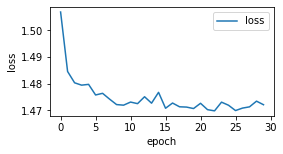

In [16]:
"""
画出误差的执行结果
"""
import matplotlib.pyplot as plt
print(epoch_list)
print(loss_list)
plt.plot(epoch_list, loss_list, label='loss')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0.9574, 0.9784, 0.982, 0.9828, 0.9822, 0.9858, 0.9852, 0.9872, 0.989, 0.989, 0.9878, 0.989, 0.986, 0.9884, 0.9848, 0.9908, 0.9884, 0.9898, 0.9898, 0.9904, 0.9884, 0.9912, 0.9918, 0.988, 0.989, 0.9912, 0.9906, 0.9898, 0.9872, 0.9888]


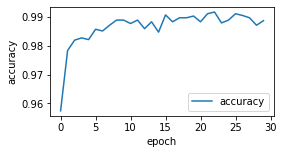

In [17]:
"""
画出准确率的执行结果
"""
print(epoch_list)
print(accuracy_list)
plt.plot(epoch_list, accuracy_list, label='accuracy')
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [18]:
"""评估模型的准确率"""
print('Accuracy: ', sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

Accuracy:  0.9897


In [20]:
"""执行预测"""
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict={x:mnist.test.images, y_label:mnist.test.labels})

In [21]:
"""查看预测结果"""
print(prediction_result[:10])

[7 2 1 0 4 1 4 9 5 9]


In [22]:
import numpy as np
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(np.reshape(images[idx], (28, 28)),cmap='binary')
        title = 'label='+ str(np.argmax(labels[idx]))
        if len(prediction) >0:
            title += ', predict='+ str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

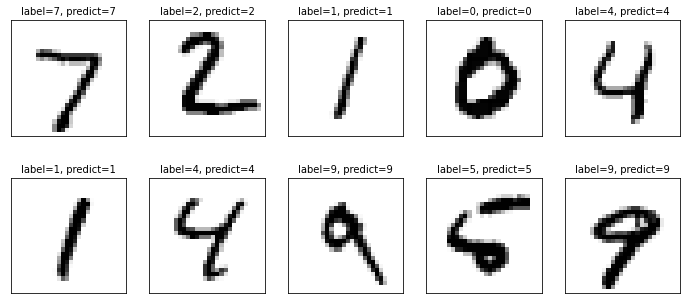

In [23]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)

## TensorBoard 

### 以可视化的方式查看用TensorFlow建立的“计算流程图”，可以按照下列步骤来看卷积神经网络的“计算图”

In [24]:
"""1首先将要显示在tensorboard中的计算图写入Log文件"""
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./log/CNN', sess.graph)